In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
'''
sujet: [classification] Déterminer si une personne atteintes de maladies cardiovasculaire  va  
mourir ou pas en fonction de ses antécédent (fumeur ou pas, diabète ou pas, hyper-tension ou pas...)

'time' très corrélé avec 'DEATH_EVENT' => a supprimer 

11 features => 2 labels : DEAD / SURVIVE
'''

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [2]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
dataset.head(300) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
dataset.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

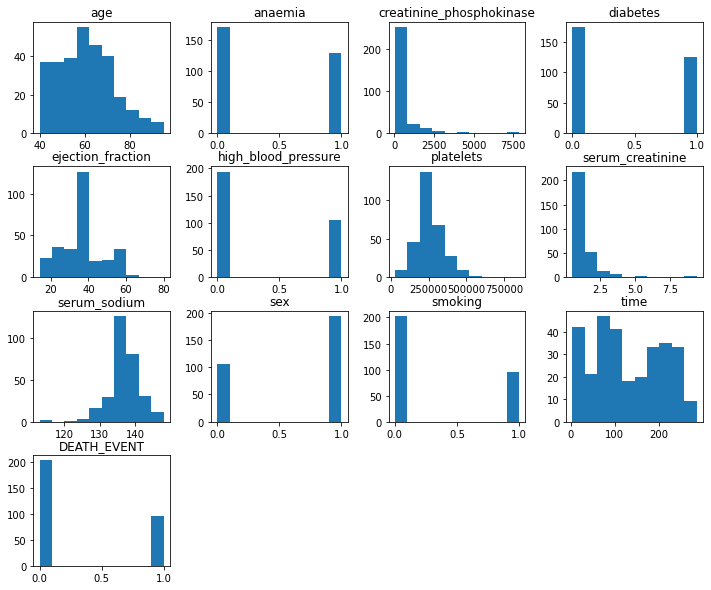

In [5]:
dataset.hist(bins=10,figsize=(12,10),grid=False);

In [6]:
dataset.info()  #aucune valeur null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
dataset.shape

(299, 13)

In [8]:
dataset.describe(include = 'all') # age: Age
                                # anaemia: Decrease of red blood cells or hemoglobin (boolean)
                                # creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
                                # diabetes : If the patient has diabetes (boolean)
                                # ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
                                # high_blood_pressure : If the patient has hypertension (boolean)
                                # platelets : Platelets in the blood (kiloplatelets/mL)
                                # serum_creatinine : Level of serum creatinine in the blood (mg/dL)
                                # serum_sodium : Level of serum sodium in the blood (mEq/L)
                                # sex : Woman or man (binary)
                                # smoking : If the patient smokes or not (boolean)
                                # time : Follow-up period (days)
                                # DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
#Probablement besoin d'uniformiser les données car il y a des ratio de 0 à 1 et des valeurs énormes à coté

"\n'time' et 'death_event'  :  tres corrélé\n'sex' et 'smoking'       :  corrélé\n\n"

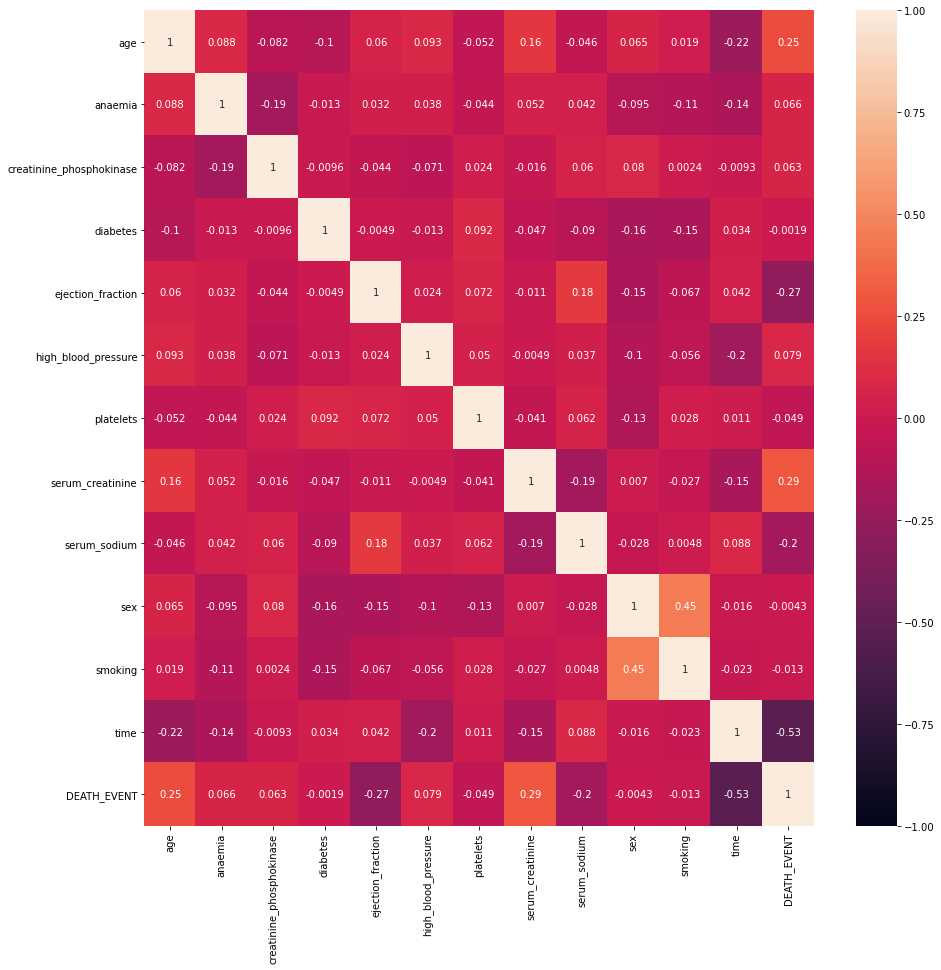

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), vmin=-1, annot=True);
'''
'time' et 'death_event'  :  tres corrélé
'sex' et 'smoking'       :  corrélé

'''
## mais 'sex' et 'smoking' reste une information importante car 
## fumer peut avoir des conséquences sur la santé d'un patient

In [11]:
#'TIME' corréleé avec 'DEATH_EVENT' ?  => verifions  
le_temps = []
score_temps = []
for i in range(dataset['time'].min(),dataset['time'].max()+1):
    score_res= 100*np.mean((dataset['time'].to_numpy() < i) == dataset['DEATH_EVENT'].to_numpy())
    print('%i : %.2f'%(i,score_res))
    le_temps.append(i)
    score_temps.append(score_res)


4 : 67.89
5 : 68.23
6 : 68.23
7 : 68.56
8 : 69.23
9 : 69.90
10 : 69.90
11 : 71.91
12 : 72.58
13 : 72.24
14 : 72.58
15 : 73.24
16 : 73.91
17 : 73.58
18 : 73.58
19 : 73.58
20 : 73.58
21 : 74.25
22 : 74.25
23 : 73.91
24 : 74.58
25 : 74.92
26 : 74.92
27 : 75.92
28 : 76.25
29 : 76.92
30 : 76.92
31 : 77.93
32 : 78.26
33 : 78.60
34 : 78.93
35 : 78.93
36 : 79.26
37 : 79.26
38 : 79.26
39 : 79.60
40 : 79.60
41 : 79.93
42 : 80.27
43 : 80.60
44 : 81.61
45 : 81.94
46 : 82.27
47 : 82.27
48 : 82.27
49 : 82.27
50 : 82.27
51 : 82.61
52 : 82.61
53 : 82.61
54 : 82.61
55 : 81.94
56 : 82.27
57 : 82.27
58 : 82.27
59 : 82.27
60 : 82.61
61 : 82.94
62 : 83.28
63 : 83.28
64 : 82.94
65 : 83.28
66 : 83.95
67 : 84.28
68 : 84.62
69 : 84.28
70 : 84.28
71 : 84.28
72 : 83.95
73 : 83.95
74 : 84.62
75 : 83.28
76 : 82.94
77 : 82.61
78 : 82.94
79 : 82.94
80 : 81.27
81 : 80.60
82 : 80.60
83 : 80.60
84 : 79.60
85 : 79.60
86 : 78.93
87 : 78.60
88 : 76.92
89 : 75.92
90 : 75.92
91 : 75.92
92 : 75.25
93 : 75.25
94 : 75.25
95 : 

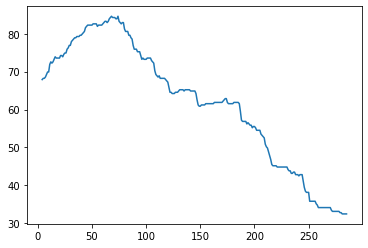

In [12]:
plt.plot(le_temps,score_temps)
## on voit la courbe atteint un pic à 84% ce qui signifie que la majorité 
## des patients sont mort avant le 'time' (jour) 74.
## le feature 'time' et bien corrélé à notre label 'DEATH_EVENT'
## De plus on ne cheche pas à prédire le jour où le patient est mort
## mais prédire si il va mourir où pas


In [13]:
# On decide donc de supprimer time 

dataset.drop('time', axis=1, inplace=True)

dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


<h2> L'AGE un indicateur de mort </h2>

In [14]:

dataset['age']= dataset['age'].astype(int) # convertit age floattant en int
mort_l=dataset["DEATH_EVENT"]
age_l = dataset["age"]  
sex_l = dataset["sex"]
diabete_l = dataset["diabetes"]
anemie_l = dataset["anaemia"]
tout_les_ages= dataset['age']

Text(0.5, 1.0, 'Taux de mortalité par age de 5 en 5')

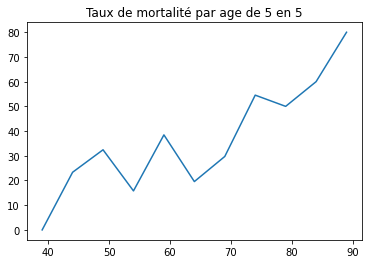

In [90]:
l_age_res = []
l_moy_res= []
debut = min(tout_les_ages)
nb_morts = 0
total = 0
for i in range(debut,max(tout_les_ages)):
    nb_morts += dataset[(dataset['age'] == i)  & (dataset['DEATH_EVENT'] == 1)].shape[0]
    total += dataset[dataset['age'] == i].shape[0]
    if((i-debut) % 5 == 0):
        moy = (nb_morts / total)*100
        l_age_res.append(i-1)
        l_moy_res.append(moy)
        total = 0
        nb_morts = 0
plt.plot(l_age_res, l_moy_res)
plt.title("Taux de mortalité par age de 5 en 5")

### <h2> Verifions si le sexe un indicateur de mort </h2>

In [16]:
homme = dataset['sex']==1
femme = dataset['sex'] ==0
homme_morts = dataset['DEATH_EVENT'][homme] == 1
femme_morts= dataset['DEATH_EVENT'][femme] == 1
homme_vivants = dataset['DEATH_EVENT'][homme] == 0
femme_vivantes = dataset['DEATH_EVENT'][femme] == 0
#print("nb Homme =", np.sum(homme) ,"nb Femme = ", np.sum(femme))
#print("nb Homme morts =", np.sum(homme_morts) ,"nb Femme morts = ", np.sum(femme_morts))

#print("nb Homme =", np.sum(homme) ,"nb Femme = ", np.sum(femme))
#print("nb Homme morts =", np.sum(homme_morts) ,"nb Femme morts = ", np.sum(femme_morts))


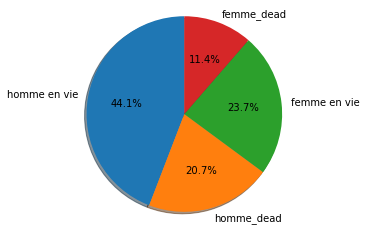

In [17]:
#petite représentation
labels = 'homme en vie', 'homme_dead', 'femme en vie', 'femme_dead' 
sizes = [np.sum(homme_vivants), np.sum(homme_morts),np.sum(femme_vivantes),np.sum(femme_morts)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter

<h2> Verifions si le DIABETE un indicateur de mort </h2>

In [18]:
les_diabetiques = dataset['diabetes'] == 1
les_non_diabetiques = dataset['diabetes'] == 0
diabetes_mort = dataset['DEATH_EVENT'][les_diabetiques]  == 1 
non_diabetique_mort = dataset['DEATH_EVENT'][les_non_diabetiques]  == 1
diabetes_vivant = dataset['DEATH_EVENT'][les_diabetiques]  == 0
non_diabetique_vivant = dataset['DEATH_EVENT'][les_non_diabetiques]  == 0



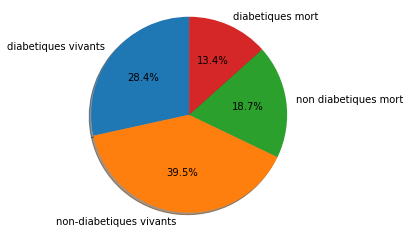

(2.125, 2.107142857142857)

In [19]:
#petite représentation
labels = 'diabetiques vivants', 'non-diabetiques vivants', 'non diabetiques mort' , 'diabetiques mort'
sizes = [np.sum(diabetes_vivant), np.sum(non_diabetique_vivant),np.sum(non_diabetique_mort),np.sum(diabetes_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter
np.sum(diabetes_vivant)/np.sum(diabetes_mort),np.sum(non_diabetique_vivant)/ np.sum(non_diabetique_mort)

<h2> Verifions si l'anémie est indicateur de mort</h2>

In [20]:
anemie_true = dataset["anaemia"] ==1
anemie_false = dataset["anaemia"]  ==0
anemia_mort = dataset['DEATH_EVENT'][anemie_true] == 1
non_anemia_mort = dataset['DEATH_EVENT'][anemie_false] == 1
anemia_vivant = dataset['DEATH_EVENT'][anemie_true] == 0
non_anemia_vivant = dataset['DEATH_EVENT'][anemie_false] == 0

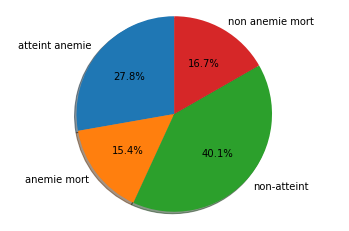

(1.8043478260869565, 2.4)

In [21]:
#petite représentation
labels = 'atteint anemie', 'anemie mort', 'non-atteint','non anemie mort'
sizes = [np.sum(anemia_vivant), np.sum(anemia_mort),np.sum(non_anemia_vivant),np.sum(non_anemia_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter
## 11.6 % des 32.7% sont mort atteint d'anemie
## 12.7 % des 43.0% sont mort non atteint d'anemie
np.sum(anemia_vivant)/np.sum(anemia_mort),np.sum(non_anemia_vivant)/ np.sum(non_anemia_mort)

<h2> Avoir une pression artériel élévé (high_blood_pressure) indicateur de mort :  </h2>

In [22]:
hpb_true = dataset["high_blood_pressure"] ==1
hpb_false = dataset["high_blood_pressure"]  ==0
hpb_mort = dataset['DEATH_EVENT'][hpb_true] == 1
non_hpb_mort = dataset['DEATH_EVENT'][hpb_false] == 1
hpb_vivant = dataset['DEATH_EVENT'][hpb_true] == 0
non_hpb_vivant = dataset['DEATH_EVENT'][hpb_false] == 0

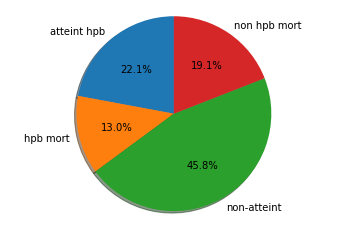

In [23]:
#petite représentation
labels = 'atteint hpb', 'hpb mort', 'non-atteint','non hpb mort'
sizes = [np.sum(hpb_vivant), np.sum(hpb_mort),np.sum(non_hpb_vivant),np.sum(non_hpb_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()
#To Do  
#A commenter

<h2>Fumer est-il un indicateur de mort ? </h2>

In [24]:
fumeur_true = dataset["smoking"] ==1
fumeur_false = dataset["smoking"]  ==0
fumeur_mort = dataset['DEATH_EVENT'][fumeur_true] == 1
non_fumeur_mort = dataset['DEATH_EVENT'][fumeur_false] == 1
fumeur_vivant = dataset['DEATH_EVENT'][fumeur_true] == 0
non_fumeur_vivant = dataset['DEATH_EVENT'][fumeur_false] == 0

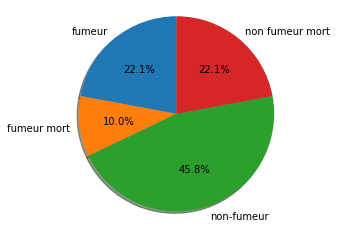

In [25]:
#petite représentation
labels = 'fumeur', 'fumeur mort', 'non-fumeur','non fumeur mort'
sizes = [np.sum(fumeur_vivant), np.sum(fumeur_mort),np.sum(non_fumeur_vivant),np.sum(non_fumeur_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Etude de la plus grande corrélation: SERUM_CREATINE </h2>

le taux de créatinine:<br>
-0.7 à 1.4 mg/dl homme normalement<br>
-0.6 à 1.1 mg/dl pour la femme <br>


In [26]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


<h2>Homme cerum NORMAL vs HOMME cerum anormal</h2>

In [36]:
serum_normal = (dataset["serum_creatinine"] >= 0.7) & (dataset["serum_creatinine"] <= 1.4)
serum_anormal =  (dataset["serum_creatinine"] < 0.7) | (dataset["serum_creatinine"] > 1.4)



serum_anormal_homme = serum_anormal & dataset['sex'] == 1
serum_anormal_homme_vivant = serum_anormal_homme & dataset["DEATH_EVENT"] == 0
serum_anormal_homme_mort   = serum_anormal_homme & dataset["DEATH_EVENT"] == 1

serum_normal_homme = serum_normal & dataset['sex'] == 1
serum_normal_homme_vivant = serum_normal_homme & dataset["DEATH_EVENT"] == 0
serum_normal_homme_mort   = serum_normal_homme & dataset["DEATH_EVENT"] == 1

In [37]:
serum_anormal[homme].shape,serum_normal[homme].shape  # 194 Hommes

((194,), (194,))

In [38]:
np.sum(dataset["DEATH_EVENT"][homme])   # 62  homme morts au total

62

In [39]:
np.sum(serum_anormal_homme_mort) + np.sum(serum_normal_homme_mort)  #62 bien mort 

62

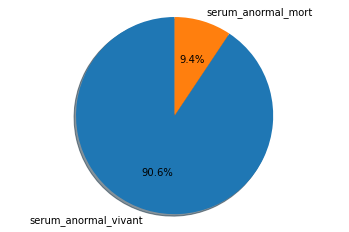

In [40]:
#petite représentation
labels = 'serum_anormal_vivant', 'serum_anormal_mort', 
sizes = [np.sum(serum_anormal_homme_vivant), np.sum(serum_anormal_homme_mort) ]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [41]:
(np.sum(serum_anormal_homme_vivant), np.sum(serum_anormal_homme_mort))  # 28 cerum anormal mort, 271 en vie

(271, 28)

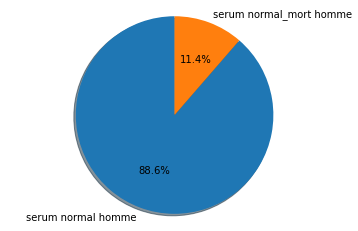

In [42]:
#petite représentation
labels = 'serum normal homme', 'serum normal_mort homme', 
sizes = [np.sum(serum_normal_homme_vivant), np.sum(serum_normal_homme_mort) ]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [43]:
(np.sum(serum_normal_homme_vivant), np.sum(serum_normal_homme_mort))  # 34 cerum normal mort , 265 en vie

(265, 34)

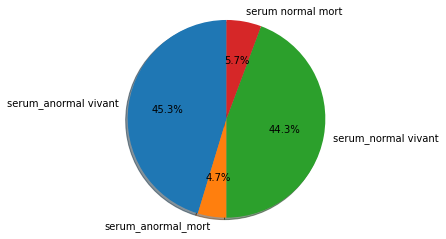

In [44]:
#petite représentation
labels = 'serum_anormal vivant', 'serum_anormal_mort', 'serum_normal vivant','serum normal mort'
sizes = [np.sum(serum_anormal_homme_vivant), np.sum(serum_anormal_homme_mort),np.sum(serum_normal_homme_vivant),np.sum(serum_normal_homme_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Femme cerum NORMAL vs Femme cerum anormal</h2>

-0.6 à 1.1 mg/dl pour la femme

In [45]:
serum_normal = (dataset["serum_creatinine"] >= 0.7) & (dataset["serum_creatinine"] <= 1.4)
serum_anormal =  (dataset["serum_creatinine"] < 0.7) | (dataset["serum_creatinine"] > 1.4)



serum_anormal_femme = serum_anormal & dataset['sex'] == 0
serum_anormal_femme_vivant = serum_anormal_femme & dataset["DEATH_EVENT"] == 0
serum_anormal_femme_mort   = serum_anormal_femme & dataset["DEATH_EVENT"] == 1

serum_normal_femme = serum_normal & dataset['sex'] == 1
serum_normal_femme_vivant = serum_normal_femme & dataset["DEATH_EVENT"] == 0
serum_normal_femme_mort   = serum_normal_femme & dataset["DEATH_EVENT"] == 1
 

In [46]:
np.sum(dataset["DEATH_EVENT"][femme])   # 34  femmes mortes au total

34

In [47]:
np.sum(serum_anormal_femme_mort) + np.sum(serum_normal_femme_mort) # 34 femmes mortes

102

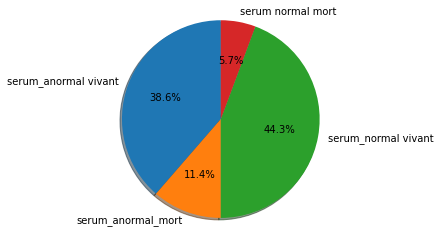

In [48]:
#petite représentation
labels = 'serum_anormal vivant', 'serum_anormal_mort', 'serum_normal vivant','serum normal mort'
sizes = [np.sum(serum_anormal_femme_vivant), np.sum(serum_anormal_femme_mort),np.sum(serum_normal_femme_vivant),np.sum(serum_normal_femme_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Standardisation </h2>

In [53]:
X = dataset.values[:, :-1]
y = dataset.values[:, -1]
#X ,y

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =5)

In [55]:
x_train , y_train

(array([[-6.98463369e-02,  1.14796753e+00,  1.65728387e-04, ...,
          1.90111381e+00, -1.35927151e+00, -6.87681906e-01],
        [ 1.82783357e-01,  1.14796753e+00, -5.37688489e-01, ...,
          7.66063830e-01, -1.35927151e+00, -6.87681906e-01],
        [-6.98463369e-02,  1.14796753e+00, -4.41679963e-01, ...,
         -3.68986146e-01,  7.35688190e-01, -6.87681906e-01],
        ...,
        [ 3.51203153e-01,  1.14796753e+00, -4.84006302e-01, ...,
          7.66063830e-01, -1.35927151e+00, -6.87681906e-01],
        [-1.75404430e+00, -8.71104775e-01, -3.48768486e-01, ...,
          7.66063830e-01, -1.35927151e+00, -6.87681906e-01],
        [-1.75404430e+00,  1.14796753e+00, -4.96394499e-01, ...,
          9.93073825e-01, -1.35927151e+00, -6.87681906e-01]]),
 array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
 

<h2>Cross-validation(recherche des meilleurs hyper-paramètres) </h2>

In [59]:
monScoring = 'accuracy'  #metrique de score classification

In [60]:
loss = ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive']    
alpha_values = np.logspace(-6,-1,200)
penal = ['l1','l2']

score_model = np.zeros((len(alpha_values),len(loss),len(penal)))

i=0
for alpha_v in alpha_values:
    j=0
    for loss_v in loss:
        k=0
        for pena_v in penal:
            model_cv=  SGDClassifier(penalty=pena_v, alpha=alpha_v , random_state=5 ,loss=loss_v , max_iter=5000)
            kfold = KFold(n_splits=5)
            cv_results = cross_val_score(model_cv, x_train, y_train, cv=kfold, scoring=monScoring)
            msg = "alpha = %f loss = %s penality = %s, accuracy: %f +/- (%f)" % (alpha_v,loss_v,pena_v, cv_results.mean(), cv_results.std())
            print(msg)
            score_model[i][j][k] = (cv_results.mean())*100
            k+=1
        j+=1
    i+=1

alpha = 0.000001 loss = hinge penality = l1, accuracy: 0.657412 +/- (0.109431)
alpha = 0.000001 loss = hinge penality = l2, accuracy: 0.692784 +/- (0.025178)
alpha = 0.000001 loss = log penality = l1, accuracy: 0.740078 +/- (0.038534)
alpha = 0.000001 loss = log penality = l2, accuracy: 0.665255 +/- (0.026048)
alpha = 0.000001 loss = modified_huber penality = l1, accuracy: 0.669098 +/- (0.073673)
alpha = 0.000001 loss = modified_huber penality = l2, accuracy: 0.657412 +/- (0.053867)
alpha = 0.000001 loss = squared_hinge penality = l1, accuracy: 0.633804 +/- (0.036808)
alpha = 0.000001 loss = squared_hinge penality = l2, accuracy: 0.688941 +/- (0.031629)
alpha = 0.000001 loss = perceptron penality = l1, accuracy: 0.680941 +/- (0.110988)
alpha = 0.000001 loss = perceptron penality = l2, accuracy: 0.704549 +/- (0.056457)
alpha = 0.000001 loss = squared_loss penality = l1, accuracy: 0.504000 +/- (0.105894)
alpha = 0.000001 loss = squared_loss penality = l2, accuracy: 0.448941 +/- (0.054152

alpha = 0.000001 loss = log penality = l2, accuracy: 0.669176 +/- (0.038987)
alpha = 0.000001 loss = modified_huber penality = l1, accuracy: 0.689020 +/- (0.039598)
alpha = 0.000001 loss = modified_huber penality = l2, accuracy: 0.677255 +/- (0.057120)
alpha = 0.000001 loss = squared_hinge penality = l1, accuracy: 0.673255 +/- (0.033846)
alpha = 0.000001 loss = squared_hinge penality = l2, accuracy: 0.676863 +/- (0.059608)
alpha = 0.000001 loss = perceptron penality = l1, accuracy: 0.700863 +/- (0.037400)
alpha = 0.000001 loss = perceptron penality = l2, accuracy: 0.704549 +/- (0.060405)
alpha = 0.000001 loss = squared_loss penality = l1, accuracy: 0.456314 +/- (0.083723)
alpha = 0.000001 loss = squared_loss penality = l2, accuracy: 0.413176 +/- (0.058129)
alpha = 0.000001 loss = huber penality = l1, accuracy: 0.574745 +/- (0.111509)
alpha = 0.000001 loss = huber penality = l2, accuracy: 0.559373 +/- (0.141974)
alpha = 0.000001 loss = epsilon_insensitive penality = l1, accuracy: 0.5353

alpha = 0.000002 loss = epsilon_insensitive penality = l2, accuracy: 0.464549 +/- (0.088047)
alpha = 0.000002 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.452471 +/- (0.104888)
alpha = 0.000002 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.578824 +/- (0.085112)
alpha = 0.000002 loss = hinge penality = l1, accuracy: 0.688941 +/- (0.119273)
alpha = 0.000002 loss = hinge penality = l2, accuracy: 0.669098 +/- (0.076740)
alpha = 0.000002 loss = log penality = l1, accuracy: 0.696627 +/- (0.040352)
alpha = 0.000002 loss = log penality = l2, accuracy: 0.685255 +/- (0.039697)
alpha = 0.000002 loss = modified_huber penality = l1, accuracy: 0.712000 +/- (0.079341)
alpha = 0.000002 loss = modified_huber penality = l2, accuracy: 0.681255 +/- (0.044394)
alpha = 0.000002 loss = squared_hinge penality = l1, accuracy: 0.645569 +/- (0.045459)
alpha = 0.000002 loss = squared_hinge penality = l2, accuracy: 0.653412 +/- (0.057085)
alpha = 0.000002 loss = perceptron penality

alpha = 0.000003 loss = huber penality = l2, accuracy: 0.503922 +/- (0.072734)
alpha = 0.000003 loss = epsilon_insensitive penality = l1, accuracy: 0.472627 +/- (0.097763)
alpha = 0.000003 loss = epsilon_insensitive penality = l2, accuracy: 0.488157 +/- (0.086903)
alpha = 0.000003 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.542902 +/- (0.063492)
alpha = 0.000003 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.476157 +/- (0.108200)
alpha = 0.000003 loss = hinge penality = l1, accuracy: 0.645333 +/- (0.109409)
alpha = 0.000003 loss = hinge penality = l2, accuracy: 0.712471 +/- (0.065725)
alpha = 0.000003 loss = log penality = l1, accuracy: 0.689020 +/- (0.037606)
alpha = 0.000003 loss = log penality = l2, accuracy: 0.641647 +/- (0.044301)
alpha = 0.000003 loss = modified_huber penality = l1, accuracy: 0.688471 +/- (0.080565)
alpha = 0.000003 loss = modified_huber penality = l2, accuracy: 0.688941 +/- (0.054769)
alpha = 0.000003 loss = squared_hinge penalit

alpha = 0.000004 loss = huber penality = l2, accuracy: 0.539686 +/- (0.071223)
alpha = 0.000004 loss = epsilon_insensitive penality = l1, accuracy: 0.590745 +/- (0.117937)
alpha = 0.000004 loss = epsilon_insensitive penality = l2, accuracy: 0.496235 +/- (0.129761)
alpha = 0.000004 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.554980 +/- (0.091436)
alpha = 0.000004 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.539294 +/- (0.102996)
alpha = 0.000004 loss = hinge penality = l1, accuracy: 0.653176 +/- (0.058972)
alpha = 0.000004 loss = hinge penality = l2, accuracy: 0.688863 +/- (0.040856)
alpha = 0.000004 loss = log penality = l1, accuracy: 0.720314 +/- (0.046429)
alpha = 0.000004 loss = log penality = l2, accuracy: 0.657490 +/- (0.067367)
alpha = 0.000004 loss = modified_huber penality = l1, accuracy: 0.677176 +/- (0.008882)
alpha = 0.000004 loss = modified_huber penality = l2, accuracy: 0.684941 +/- (0.051709)
alpha = 0.000004 loss = squared_hinge penalit

alpha = 0.000005 loss = squared_loss penality = l1, accuracy: 0.543137 +/- (0.092303)
alpha = 0.000005 loss = squared_loss penality = l2, accuracy: 0.586510 +/- (0.051903)
alpha = 0.000005 loss = huber penality = l1, accuracy: 0.571373 +/- (0.103306)
alpha = 0.000005 loss = huber penality = l2, accuracy: 0.507608 +/- (0.095097)
alpha = 0.000005 loss = epsilon_insensitive penality = l1, accuracy: 0.523294 +/- (0.122547)
alpha = 0.000005 loss = epsilon_insensitive penality = l2, accuracy: 0.531608 +/- (0.094187)
alpha = 0.000005 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.496078 +/- (0.120489)
alpha = 0.000005 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.570980 +/- (0.126918)
alpha = 0.000006 loss = hinge penality = l1, accuracy: 0.669490 +/- (0.056350)
alpha = 0.000006 loss = hinge penality = l2, accuracy: 0.708471 +/- (0.072516)
alpha = 0.000006 loss = log penality = l1, accuracy: 0.704235 +/- (0.077037)
alpha = 0.000006 loss = log penality = l2, accu

alpha = 0.000007 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.464941 +/- (0.160827)
alpha = 0.000007 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.484784 +/- (0.101296)
alpha = 0.000008 loss = hinge penality = l1, accuracy: 0.673020 +/- (0.087311)
alpha = 0.000008 loss = hinge penality = l2, accuracy: 0.693020 +/- (0.052881)
alpha = 0.000008 loss = log penality = l1, accuracy: 0.688549 +/- (0.067531)
alpha = 0.000008 loss = log penality = l2, accuracy: 0.676627 +/- (0.081055)
alpha = 0.000008 loss = modified_huber penality = l1, accuracy: 0.657176 +/- (0.088720)
alpha = 0.000008 loss = modified_huber penality = l2, accuracy: 0.672784 +/- (0.063298)
alpha = 0.000008 loss = squared_hinge penality = l1, accuracy: 0.645569 +/- (0.063763)
alpha = 0.000008 loss = squared_hinge penality = l2, accuracy: 0.653412 +/- (0.041483)
alpha = 0.000008 loss = perceptron penality = l1, accuracy: 0.681255 +/- (0.027213)
alpha = 0.000008 loss = perceptron penality = l2, ac

alpha = 0.000010 loss = squared_hinge penality = l1, accuracy: 0.626039 +/- (0.080073)
alpha = 0.000010 loss = squared_hinge penality = l2, accuracy: 0.645176 +/- (0.072281)
alpha = 0.000010 loss = perceptron penality = l1, accuracy: 0.700706 +/- (0.060368)
alpha = 0.000010 loss = perceptron penality = l2, accuracy: 0.626039 +/- (0.070905)
alpha = 0.000010 loss = squared_loss penality = l1, accuracy: 0.519608 +/- (0.041130)
alpha = 0.000010 loss = squared_loss penality = l2, accuracy: 0.417333 +/- (0.043645)
alpha = 0.000010 loss = huber penality = l1, accuracy: 0.610510 +/- (0.105391)
alpha = 0.000010 loss = huber penality = l2, accuracy: 0.551216 +/- (0.033103)
alpha = 0.000010 loss = epsilon_insensitive penality = l1, accuracy: 0.409725 +/- (0.112998)
alpha = 0.000010 loss = epsilon_insensitive penality = l2, accuracy: 0.531137 +/- (0.098335)
alpha = 0.000010 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.511137 +/- (0.103001)
alpha = 0.000010 loss = squared_epsilon_i

alpha = 0.000014 loss = epsilon_insensitive penality = l1, accuracy: 0.532000 +/- (0.078563)
alpha = 0.000014 loss = epsilon_insensitive penality = l2, accuracy: 0.535451 +/- (0.108400)
alpha = 0.000014 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.582353 +/- (0.068375)
alpha = 0.000014 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.488078 +/- (0.102003)
alpha = 0.000014 loss = hinge penality = l1, accuracy: 0.614039 +/- (0.121035)
alpha = 0.000014 loss = hinge penality = l2, accuracy: 0.649490 +/- (0.100681)
alpha = 0.000014 loss = log penality = l1, accuracy: 0.606275 +/- (0.021707)
alpha = 0.000014 loss = log penality = l2, accuracy: 0.680784 +/- (0.055437)
alpha = 0.000014 loss = modified_huber penality = l1, accuracy: 0.728235 +/- (0.034625)
alpha = 0.000014 loss = modified_huber penality = l2, accuracy: 0.649490 +/- (0.046257)
alpha = 0.000014 loss = squared_hinge penality = l1, accuracy: 0.684863 +/- (0.049249)
alpha = 0.000014 loss = squared_hinge

alpha = 0.000019 loss = squared_hinge penality = l2, accuracy: 0.676863 +/- (0.054203)
alpha = 0.000019 loss = perceptron penality = l1, accuracy: 0.622118 +/- (0.098446)
alpha = 0.000019 loss = perceptron penality = l2, accuracy: 0.700392 +/- (0.070571)
alpha = 0.000019 loss = squared_loss penality = l1, accuracy: 0.484314 +/- (0.104420)
alpha = 0.000019 loss = squared_loss penality = l2, accuracy: 0.547059 +/- (0.096138)
alpha = 0.000019 loss = huber penality = l1, accuracy: 0.692627 +/- (0.072257)
alpha = 0.000019 loss = huber penality = l2, accuracy: 0.562667 +/- (0.121178)
alpha = 0.000019 loss = epsilon_insensitive penality = l1, accuracy: 0.566902 +/- (0.083261)
alpha = 0.000019 loss = epsilon_insensitive penality = l2, accuracy: 0.535373 +/- (0.011661)
alpha = 0.000019 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.504157 +/- (0.077514)
alpha = 0.000019 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.547529 +/- (0.038299)
alpha = 0.000020 loss = hin

alpha = 0.000026 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.531765 +/- (0.102220)
alpha = 0.000027 loss = hinge penality = l1, accuracy: 0.692706 +/- (0.042083)
alpha = 0.000027 loss = hinge penality = l2, accuracy: 0.673020 +/- (0.065114)
alpha = 0.000027 loss = log penality = l1, accuracy: 0.684941 +/- (0.039966)
alpha = 0.000027 loss = log penality = l2, accuracy: 0.625804 +/- (0.102944)
alpha = 0.000027 loss = modified_huber penality = l1, accuracy: 0.649569 +/- (0.063867)
alpha = 0.000027 loss = modified_huber penality = l2, accuracy: 0.641490 +/- (0.064015)
alpha = 0.000027 loss = squared_hinge penality = l1, accuracy: 0.657255 +/- (0.053632)
alpha = 0.000027 loss = squared_hinge penality = l2, accuracy: 0.704471 +/- (0.039473)
alpha = 0.000027 loss = perceptron penality = l1, accuracy: 0.657333 +/- (0.088792)
alpha = 0.000027 loss = perceptron penality = l2, accuracy: 0.677020 +/- (0.085223)
alpha = 0.000027 loss = squared_loss penality = l1, accuracy: 0.47223

alpha = 0.000036 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.488078 +/- (0.183375)
alpha = 0.000036 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.452471 +/- (0.137835)
alpha = 0.000038 loss = hinge penality = l1, accuracy: 0.673255 +/- (0.083603)
alpha = 0.000038 loss = hinge penality = l2, accuracy: 0.668941 +/- (0.076681)
alpha = 0.000038 loss = log penality = l1, accuracy: 0.684784 +/- (0.035506)
alpha = 0.000038 loss = log penality = l2, accuracy: 0.669255 +/- (0.098831)
alpha = 0.000038 loss = modified_huber penality = l1, accuracy: 0.676941 +/- (0.064014)
alpha = 0.000038 loss = modified_huber penality = l2, accuracy: 0.731765 +/- (0.071480)
alpha = 0.000038 loss = squared_hinge penality = l1, accuracy: 0.661176 +/- (0.048955)
alpha = 0.000038 loss = squared_hinge penality = l2, accuracy: 0.614353 +/- (0.046005)
alpha = 0.000038 loss = perceptron penality = l1, accuracy: 0.708314 +/- (0.060821)
alpha = 0.000038 loss = perceptron penality = l2, ac

alpha = 0.000051 loss = huber penality = l2, accuracy: 0.610118 +/- (0.152374)
alpha = 0.000051 loss = epsilon_insensitive penality = l1, accuracy: 0.480627 +/- (0.070959)
alpha = 0.000051 loss = epsilon_insensitive penality = l2, accuracy: 0.535608 +/- (0.031807)
alpha = 0.000051 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.444706 +/- (0.058985)
alpha = 0.000051 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.402118 +/- (0.097078)
alpha = 0.000054 loss = hinge penality = l1, accuracy: 0.661098 +/- (0.065698)
alpha = 0.000054 loss = hinge penality = l2, accuracy: 0.727843 +/- (0.083137)
alpha = 0.000054 loss = log penality = l1, accuracy: 0.673020 +/- (0.038363)
alpha = 0.000054 loss = log penality = l2, accuracy: 0.692706 +/- (0.076963)
alpha = 0.000054 loss = modified_huber penality = l1, accuracy: 0.708549 +/- (0.042644)
alpha = 0.000054 loss = modified_huber penality = l2, accuracy: 0.661333 +/- (0.065315)
alpha = 0.000054 loss = squared_hinge penalit

alpha = 0.000072 loss = perceptron penality = l2, accuracy: 0.637490 +/- (0.061083)
alpha = 0.000072 loss = squared_loss penality = l1, accuracy: 0.551373 +/- (0.112532)
alpha = 0.000072 loss = squared_loss penality = l2, accuracy: 0.559059 +/- (0.096459)
alpha = 0.000072 loss = huber penality = l1, accuracy: 0.680941 +/- (0.030628)
alpha = 0.000072 loss = huber penality = l2, accuracy: 0.582980 +/- (0.075451)
alpha = 0.000072 loss = epsilon_insensitive penality = l1, accuracy: 0.602039 +/- (0.083481)
alpha = 0.000072 loss = epsilon_insensitive penality = l2, accuracy: 0.496078 +/- (0.089769)
alpha = 0.000072 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.425333 +/- (0.075767)
alpha = 0.000072 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.515137 +/- (0.124937)
alpha = 0.000077 loss = hinge penality = l1, accuracy: 0.681020 +/- (0.079132)
alpha = 0.000077 loss = hinge penality = l2, accuracy: 0.696549 +/- (0.065651)
alpha = 0.000077 loss = log penality = l

alpha = 0.000097 loss = epsilon_insensitive penality = l2, accuracy: 0.582588 +/- (0.049339)
alpha = 0.000097 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.531373 +/- (0.060879)
alpha = 0.000097 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.417490 +/- (0.078737)
alpha = 0.000102 loss = hinge penality = l1, accuracy: 0.673098 +/- (0.086057)
alpha = 0.000102 loss = hinge penality = l2, accuracy: 0.712471 +/- (0.025076)
alpha = 0.000102 loss = log penality = l1, accuracy: 0.665176 +/- (0.057925)
alpha = 0.000102 loss = log penality = l2, accuracy: 0.617882 +/- (0.064225)
alpha = 0.000102 loss = modified_huber penality = l1, accuracy: 0.617882 +/- (0.094298)
alpha = 0.000102 loss = modified_huber penality = l2, accuracy: 0.665333 +/- (0.092008)
alpha = 0.000102 loss = squared_hinge penality = l1, accuracy: 0.633725 +/- (0.048386)
alpha = 0.000102 loss = squared_hinge penality = l2, accuracy: 0.661412 +/- (0.050187)
alpha = 0.000102 loss = perceptron penality

alpha = 0.000137 loss = squared_loss penality = l2, accuracy: 0.579059 +/- (0.099325)
alpha = 0.000137 loss = huber penality = l1, accuracy: 0.677020 +/- (0.108980)
alpha = 0.000137 loss = huber penality = l2, accuracy: 0.637725 +/- (0.044516)
alpha = 0.000137 loss = epsilon_insensitive penality = l1, accuracy: 0.590745 +/- (0.090659)
alpha = 0.000137 loss = epsilon_insensitive penality = l2, accuracy: 0.613725 +/- (0.088908)
alpha = 0.000137 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.567216 +/- (0.108544)
alpha = 0.000137 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.468627 +/- (0.098509)
alpha = 0.000145 loss = hinge penality = l1, accuracy: 0.673333 +/- (0.051365)
alpha = 0.000145 loss = hinge penality = l2, accuracy: 0.680706 +/- (0.093204)
alpha = 0.000145 loss = log penality = l1, accuracy: 0.685020 +/- (0.032906)
alpha = 0.000145 loss = log penality = l2, accuracy: 0.621882 +/- (0.107559)
alpha = 0.000145 loss = modified_huber penality = l1, ac

alpha = 0.000193 loss = log penality = l2, accuracy: 0.649412 +/- (0.097128)
alpha = 0.000193 loss = modified_huber penality = l1, accuracy: 0.649412 +/- (0.059917)
alpha = 0.000193 loss = modified_huber penality = l2, accuracy: 0.653333 +/- (0.052061)
alpha = 0.000193 loss = squared_hinge penality = l1, accuracy: 0.641569 +/- (0.039575)
alpha = 0.000193 loss = squared_hinge penality = l2, accuracy: 0.665176 +/- (0.060522)
alpha = 0.000193 loss = perceptron penality = l1, accuracy: 0.645569 +/- (0.019362)
alpha = 0.000193 loss = perceptron penality = l2, accuracy: 0.664941 +/- (0.113845)
alpha = 0.000193 loss = squared_loss penality = l1, accuracy: 0.456706 +/- (0.146413)
alpha = 0.000193 loss = squared_loss penality = l2, accuracy: 0.464235 +/- (0.099139)
alpha = 0.000193 loss = huber penality = l1, accuracy: 0.704314 +/- (0.073433)
alpha = 0.000193 loss = huber penality = l2, accuracy: 0.625882 +/- (0.026201)
alpha = 0.000193 loss = epsilon_insensitive penality = l1, accuracy: 0.6298

alpha = 0.000274 loss = log penality = l1, accuracy: 0.712549 +/- (0.038734)
alpha = 0.000274 loss = log penality = l2, accuracy: 0.688784 +/- (0.098621)
alpha = 0.000274 loss = modified_huber penality = l1, accuracy: 0.633725 +/- (0.078651)
alpha = 0.000274 loss = modified_huber penality = l2, accuracy: 0.692706 +/- (0.051901)
alpha = 0.000274 loss = squared_hinge penality = l1, accuracy: 0.586667 +/- (0.137347)
alpha = 0.000274 loss = squared_hinge penality = l2, accuracy: 0.700471 +/- (0.071133)
alpha = 0.000274 loss = perceptron penality = l1, accuracy: 0.602588 +/- (0.074776)
alpha = 0.000274 loss = perceptron penality = l2, accuracy: 0.653725 +/- (0.095943)
alpha = 0.000274 loss = squared_loss penality = l1, accuracy: 0.480471 +/- (0.122476)
alpha = 0.000274 loss = squared_loss penality = l2, accuracy: 0.558353 +/- (0.095324)
alpha = 0.000274 loss = huber penality = l1, accuracy: 0.708314 +/- (0.096898)
alpha = 0.000274 loss = huber penality = l2, accuracy: 0.673098 +/- (0.055675

alpha = 0.000387 loss = log penality = l2, accuracy: 0.669176 +/- (0.103669)
alpha = 0.000387 loss = modified_huber penality = l1, accuracy: 0.708471 +/- (0.077637)
alpha = 0.000387 loss = modified_huber penality = l2, accuracy: 0.661490 +/- (0.096901)
alpha = 0.000387 loss = squared_hinge penality = l1, accuracy: 0.629725 +/- (0.038010)
alpha = 0.000387 loss = squared_hinge penality = l2, accuracy: 0.602275 +/- (0.055191)
alpha = 0.000387 loss = perceptron penality = l1, accuracy: 0.645804 +/- (0.043670)
alpha = 0.000387 loss = perceptron penality = l2, accuracy: 0.625882 +/- (0.084531)
alpha = 0.000387 loss = squared_loss penality = l1, accuracy: 0.523686 +/- (0.127636)
alpha = 0.000387 loss = squared_loss penality = l2, accuracy: 0.500000 +/- (0.026307)
alpha = 0.000387 loss = huber penality = l1, accuracy: 0.669098 +/- (0.055865)
alpha = 0.000387 loss = huber penality = l2, accuracy: 0.684863 +/- (0.049249)
alpha = 0.000387 loss = epsilon_insensitive penality = l1, accuracy: 0.6143

alpha = 0.000517 loss = epsilon_insensitive penality = l2, accuracy: 0.669098 +/- (0.037806)
alpha = 0.000517 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.511529 +/- (0.064816)
alpha = 0.000517 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.539373 +/- (0.080846)
alpha = 0.000548 loss = hinge penality = l1, accuracy: 0.716549 +/- (0.053367)
alpha = 0.000548 loss = hinge penality = l2, accuracy: 0.700706 +/- (0.089165)
alpha = 0.000548 loss = log penality = l1, accuracy: 0.704627 +/- (0.035858)
alpha = 0.000548 loss = log penality = l2, accuracy: 0.688863 +/- (0.067758)
alpha = 0.000548 loss = modified_huber penality = l1, accuracy: 0.661412 +/- (0.093936)
alpha = 0.000548 loss = modified_huber penality = l2, accuracy: 0.660863 +/- (0.079169)
alpha = 0.000548 loss = squared_hinge penality = l1, accuracy: 0.602196 +/- (0.063560)
alpha = 0.000548 loss = squared_hinge penality = l2, accuracy: 0.676549 +/- (0.111154)
alpha = 0.000548 loss = perceptron penality

alpha = 0.000732 loss = huber penality = l2, accuracy: 0.692706 +/- (0.062642)
alpha = 0.000732 loss = epsilon_insensitive penality = l1, accuracy: 0.637882 +/- (0.134236)
alpha = 0.000732 loss = epsilon_insensitive penality = l2, accuracy: 0.649490 +/- (0.058052)
alpha = 0.000732 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.479608 +/- (0.160648)
alpha = 0.000732 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.479608 +/- (0.153301)
alpha = 0.000775 loss = hinge penality = l1, accuracy: 0.700471 +/- (0.050983)
alpha = 0.000775 loss = hinge penality = l2, accuracy: 0.724078 +/- (0.060106)
alpha = 0.000775 loss = log penality = l1, accuracy: 0.720235 +/- (0.039989)
alpha = 0.000775 loss = log penality = l2, accuracy: 0.696706 +/- (0.054325)
alpha = 0.000775 loss = modified_huber penality = l1, accuracy: 0.641725 +/- (0.061232)
alpha = 0.000775 loss = modified_huber penality = l2, accuracy: 0.688471 +/- (0.075642)
alpha = 0.000775 loss = squared_hinge penalit

alpha = 0.001035 loss = squared_loss penality = l2, accuracy: 0.586745 +/- (0.132580)
alpha = 0.001035 loss = huber penality = l1, accuracy: 0.700549 +/- (0.060065)
alpha = 0.001035 loss = huber penality = l2, accuracy: 0.696549 +/- (0.046443)
alpha = 0.001035 loss = epsilon_insensitive penality = l1, accuracy: 0.736314 +/- (0.028515)
alpha = 0.001035 loss = epsilon_insensitive penality = l2, accuracy: 0.555451 +/- (0.109521)
alpha = 0.001035 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.538902 +/- (0.094430)
alpha = 0.001035 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.550667 +/- (0.130141)
alpha = 0.001097 loss = hinge penality = l1, accuracy: 0.716235 +/- (0.067864)
alpha = 0.001097 loss = hinge penality = l2, accuracy: 0.669176 +/- (0.064299)
alpha = 0.001097 loss = log penality = l1, accuracy: 0.704392 +/- (0.053451)
alpha = 0.001097 loss = log penality = l2, accuracy: 0.716235 +/- (0.059406)
alpha = 0.001097 loss = modified_huber penality = l1, ac

alpha = 0.001465 loss = squared_hinge penality = l2, accuracy: 0.590745 +/- (0.091503)
alpha = 0.001465 loss = perceptron penality = l1, accuracy: 0.602588 +/- (0.076805)
alpha = 0.001465 loss = perceptron penality = l2, accuracy: 0.704471 +/- (0.063394)
alpha = 0.001465 loss = squared_loss penality = l1, accuracy: 0.614275 +/- (0.063326)
alpha = 0.001465 loss = squared_loss penality = l2, accuracy: 0.657647 +/- (0.068953)
alpha = 0.001465 loss = huber penality = l1, accuracy: 0.696706 +/- (0.041484)
alpha = 0.001465 loss = huber penality = l2, accuracy: 0.704549 +/- (0.036633)
alpha = 0.001465 loss = epsilon_insensitive penality = l1, accuracy: 0.669333 +/- (0.101647)
alpha = 0.001465 loss = epsilon_insensitive penality = l2, accuracy: 0.688627 +/- (0.070309)
alpha = 0.001465 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.621882 +/- (0.061039)
alpha = 0.001465 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.547373 +/- (0.074644)
alpha = 0.001552 loss = hin

alpha = 0.002073 loss = perceptron penality = l1, accuracy: 0.665333 +/- (0.060811)
alpha = 0.002073 loss = perceptron penality = l2, accuracy: 0.653333 +/- (0.113403)
alpha = 0.002073 loss = squared_loss penality = l1, accuracy: 0.704549 +/- (0.029675)
alpha = 0.002073 loss = squared_loss penality = l2, accuracy: 0.602431 +/- (0.080370)
alpha = 0.002073 loss = huber penality = l1, accuracy: 0.696784 +/- (0.053817)
alpha = 0.002073 loss = huber penality = l2, accuracy: 0.700627 +/- (0.058243)
alpha = 0.002073 loss = epsilon_insensitive penality = l1, accuracy: 0.688706 +/- (0.036523)
alpha = 0.002073 loss = epsilon_insensitive penality = l2, accuracy: 0.731843 +/- (0.066447)
alpha = 0.002073 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.708392 +/- (0.073996)
alpha = 0.002073 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.582824 +/- (0.132768)
alpha = 0.002196 loss = hinge penality = l1, accuracy: 0.700627 +/- (0.032946)
alpha = 0.002196 loss = hinge penal

alpha = 0.002768 loss = huber penality = l2, accuracy: 0.708471 +/- (0.055728)
alpha = 0.002768 loss = epsilon_insensitive penality = l1, accuracy: 0.704471 +/- (0.058340)
alpha = 0.002768 loss = epsilon_insensitive penality = l2, accuracy: 0.673098 +/- (0.088697)
alpha = 0.002768 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.633725 +/- (0.051467)
alpha = 0.002768 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.649725 +/- (0.130574)
alpha = 0.002933 loss = hinge penality = l1, accuracy: 0.724235 +/- (0.049107)
alpha = 0.002933 loss = hinge penality = l2, accuracy: 0.751608 +/- (0.065787)
alpha = 0.002933 loss = log penality = l1, accuracy: 0.716235 +/- (0.060687)
alpha = 0.002933 loss = log penality = l2, accuracy: 0.747765 +/- (0.058778)
alpha = 0.002933 loss = modified_huber penality = l1, accuracy: 0.689098 +/- (0.063145)
alpha = 0.002933 loss = modified_huber penality = l2, accuracy: 0.657255 +/- (0.101283)
alpha = 0.002933 loss = squared_hinge penalit

alpha = 0.003917 loss = hinge penality = l2, accuracy: 0.700706 +/- (0.040559)
alpha = 0.003917 loss = log penality = l1, accuracy: 0.720157 +/- (0.067719)
alpha = 0.003917 loss = log penality = l2, accuracy: 0.739922 +/- (0.059908)
alpha = 0.003917 loss = modified_huber penality = l1, accuracy: 0.685098 +/- (0.073089)
alpha = 0.003917 loss = modified_huber penality = l2, accuracy: 0.677020 +/- (0.098608)
alpha = 0.003917 loss = squared_hinge penality = l1, accuracy: 0.712392 +/- (0.094819)
alpha = 0.003917 loss = squared_hinge penality = l2, accuracy: 0.677020 +/- (0.083399)
alpha = 0.003917 loss = perceptron penality = l1, accuracy: 0.610118 +/- (0.091108)
alpha = 0.003917 loss = perceptron penality = l2, accuracy: 0.669333 +/- (0.045030)
alpha = 0.003917 loss = squared_loss penality = l1, accuracy: 0.688706 +/- (0.038571)
alpha = 0.003917 loss = squared_loss penality = l2, accuracy: 0.673098 +/- (0.052841)
alpha = 0.003917 loss = huber penality = l1, accuracy: 0.688706 +/- (0.056386

alpha = 0.005231 loss = huber penality = l1, accuracy: 0.688706 +/- (0.052134)
alpha = 0.005231 loss = huber penality = l2, accuracy: 0.708471 +/- (0.052896)
alpha = 0.005231 loss = epsilon_insensitive penality = l1, accuracy: 0.704392 +/- (0.080919)
alpha = 0.005231 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.067455)
alpha = 0.005231 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.712549 +/- (0.020587)
alpha = 0.005231 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.625961 +/- (0.094491)
alpha = 0.005543 loss = hinge penality = l1, accuracy: 0.732078 +/- (0.062511)
alpha = 0.005543 loss = hinge penality = l2, accuracy: 0.743843 +/- (0.056830)
alpha = 0.005543 loss = log penality = l1, accuracy: 0.728157 +/- (0.059661)
alpha = 0.005543 loss = log penality = l2, accuracy: 0.736000 +/- (0.058788)
alpha = 0.005543 loss = modified_huber penality = l1, accuracy: 0.689020 +/- (0.048342)
alpha = 0.005543 loss = modified_huber penality = l2, 

alpha = 0.007402 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.700471 +/- (0.055323)
alpha = 0.007402 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.665255 +/- (0.053212)
alpha = 0.007843 loss = hinge penality = l1, accuracy: 0.739922 +/- (0.058610)
alpha = 0.007843 loss = hinge penality = l2, accuracy: 0.724157 +/- (0.063314)
alpha = 0.007843 loss = log penality = l1, accuracy: 0.732078 +/- (0.051742)
alpha = 0.007843 loss = log penality = l2, accuracy: 0.728157 +/- (0.049829)
alpha = 0.007843 loss = modified_huber penality = l1, accuracy: 0.708392 +/- (0.056290)
alpha = 0.007843 loss = modified_huber penality = l2, accuracy: 0.692863 +/- (0.050782)
alpha = 0.007843 loss = squared_hinge penality = l1, accuracy: 0.720157 +/- (0.047740)
alpha = 0.007843 loss = squared_hinge penality = l2, accuracy: 0.685020 +/- (0.049668)
alpha = 0.007843 loss = perceptron penality = l1, accuracy: 0.692941 +/- (0.108434)
alpha = 0.007843 loss = perceptron penality = l2, ac

alpha = 0.010474 loss = squared_loss penality = l1, accuracy: 0.708627 +/- (0.051872)
alpha = 0.010474 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.061425)
alpha = 0.010474 loss = huber penality = l1, accuracy: 0.673020 +/- (0.042181)
alpha = 0.010474 loss = huber penality = l2, accuracy: 0.696549 +/- (0.064469)
alpha = 0.010474 loss = epsilon_insensitive penality = l1, accuracy: 0.704549 +/- (0.070943)
alpha = 0.010474 loss = epsilon_insensitive penality = l2, accuracy: 0.708392 +/- (0.061512)
alpha = 0.010474 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.731843 +/- (0.089176)
alpha = 0.010474 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.696784 +/- (0.061798)
alpha = 0.011098 loss = hinge penality = l1, accuracy: 0.732078 +/- (0.058704)
alpha = 0.011098 loss = hinge penality = l2, accuracy: 0.736000 +/- (0.056111)
alpha = 0.011098 loss = log penality = l1, accuracy: 0.736000 +/- (0.057465)
alpha = 0.011098 loss = log penality = l2, accu

alpha = 0.014820 loss = squared_hinge penality = l2, accuracy: 0.716392 +/- (0.051361)
alpha = 0.014820 loss = perceptron penality = l1, accuracy: 0.680941 +/- (0.103086)
alpha = 0.014820 loss = perceptron penality = l2, accuracy: 0.673333 +/- (0.131332)
alpha = 0.014820 loss = squared_loss penality = l1, accuracy: 0.724235 +/- (0.060348)
alpha = 0.014820 loss = squared_loss penality = l2, accuracy: 0.739922 +/- (0.066014)
alpha = 0.014820 loss = huber penality = l1, accuracy: 0.673098 +/- (0.037524)
alpha = 0.014820 loss = huber penality = l2, accuracy: 0.688706 +/- (0.061600)
alpha = 0.014820 loss = epsilon_insensitive penality = l1, accuracy: 0.688627 +/- (0.079545)
alpha = 0.014820 loss = epsilon_insensitive penality = l2, accuracy: 0.688784 +/- (0.057158)
alpha = 0.014820 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724000 +/- (0.086770)
alpha = 0.014820 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.724235 +/- (0.071970)
alpha = 0.015703 loss = hin

alpha = 0.019792 loss = huber penality = l2, accuracy: 0.688706 +/- (0.052134)
alpha = 0.019792 loss = epsilon_insensitive penality = l1, accuracy: 0.696471 +/- (0.075945)
alpha = 0.019792 loss = epsilon_insensitive penality = l2, accuracy: 0.688784 +/- (0.062307)
alpha = 0.019792 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.716392 +/- (0.028151)
alpha = 0.019792 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.728078 +/- (0.061425)
alpha = 0.020970 loss = hinge penality = l1, accuracy: 0.724235 +/- (0.055015)
alpha = 0.020970 loss = hinge penality = l2, accuracy: 0.728078 +/- (0.061425)
alpha = 0.020970 loss = log penality = l1, accuracy: 0.751686 +/- (0.069853)
alpha = 0.020970 loss = log penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.020970 loss = modified_huber penality = l1, accuracy: 0.692627 +/- (0.046317)
alpha = 0.020970 loss = modified_huber penality = l2, accuracy: 0.739922 +/- (0.055925)
alpha = 0.020970 loss = squared_hinge penalit

alpha = 0.028005 loss = hinge penality = l2, accuracy: 0.732000 +/- (0.061760)
alpha = 0.028005 loss = log penality = l1, accuracy: 0.751686 +/- (0.066469)
alpha = 0.028005 loss = log penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.028005 loss = modified_huber penality = l1, accuracy: 0.708471 +/- (0.043305)
alpha = 0.028005 loss = modified_huber penality = l2, accuracy: 0.743843 +/- (0.056830)
alpha = 0.028005 loss = squared_hinge penality = l1, accuracy: 0.743765 +/- (0.058701)
alpha = 0.028005 loss = squared_hinge penality = l2, accuracy: 0.724157 +/- (0.054149)
alpha = 0.028005 loss = perceptron penality = l1, accuracy: 0.731765 +/- (0.076670)
alpha = 0.028005 loss = perceptron penality = l2, accuracy: 0.680941 +/- (0.085108)
alpha = 0.028005 loss = squared_loss penality = l1, accuracy: 0.728157 +/- (0.058358)
alpha = 0.028005 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.077511)
alpha = 0.028005 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.037399 loss = squared_hinge penality = l1, accuracy: 0.755529 +/- (0.059745)
alpha = 0.037399 loss = squared_hinge penality = l2, accuracy: 0.728000 +/- (0.065578)
alpha = 0.037399 loss = perceptron penality = l1, accuracy: 0.684863 +/- (0.080150)
alpha = 0.037399 loss = perceptron penality = l2, accuracy: 0.645569 +/- (0.031465)
alpha = 0.037399 loss = squared_loss penality = l1, accuracy: 0.728235 +/- (0.069927)
alpha = 0.037399 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.054810)
alpha = 0.037399 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.037399 loss = huber penality = l2, accuracy: 0.684784 +/- (0.055733)
alpha = 0.037399 loss = epsilon_insensitive penality = l1, accuracy: 0.684784 +/- (0.055733)
alpha = 0.037399 loss = epsilon_insensitive penality = l2, accuracy: 0.708549 +/- (0.053806)
alpha = 0.037399 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.739922 +/- (0.055925)
alpha = 0.037399 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.039627 loss = perceptron penality = l1, accuracy: 0.724078 +/- (0.074913)
alpha = 0.039627 loss = perceptron penality = l2, accuracy: 0.622275 +/- (0.130899)
alpha = 0.039627 loss = squared_loss penality = l1, accuracy: 0.720392 +/- (0.065240)
alpha = 0.039627 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.054810)
alpha = 0.039627 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.039627 loss = huber penality = l2, accuracy: 0.684784 +/- (0.055733)
alpha = 0.039627 loss = epsilon_insensitive penality = l1, accuracy: 0.688706 +/- (0.059050)
alpha = 0.039627 loss = epsilon_insensitive penality = l2, accuracy: 0.700549 +/- (0.060065)
alpha = 0.039627 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724157 +/- (0.066858)
alpha = 0.039627 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.736000 +/- (0.065000)
alpha = 0.041987 loss = hinge penality = l1, accuracy: 0.708471 +/- (0.058422)
alpha = 0.041987 loss = hinge penal

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.041987 loss = squared_hinge penality = l1, accuracy: 0.743765 +/- (0.066095)
alpha = 0.041987 loss = squared_hinge penality = l2, accuracy: 0.731922 +/- (0.065896)
alpha = 0.041987 loss = perceptron penality = l1, accuracy: 0.680549 +/- (0.089951)
alpha = 0.041987 loss = perceptron penality = l2, accuracy: 0.677020 +/- (0.051472)
alpha = 0.041987 loss = squared_loss penality = l1, accuracy: 0.724314 +/- (0.043556)
alpha = 0.041987 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.054810)
alpha = 0.041987 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.041987 loss = huber penality = l2, accuracy: 0.684784 +/- (0.055733)
alpha = 0.041987 loss = epsilon_insensitive penality = l1, accuracy: 0.680863 +/- (0.053370)
alpha = 0.041987 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.053466)
alpha = 0.041987 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.727922 +/- (0.060032)
alpha = 0.041987 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.044488 loss = squared_hinge penality = l1, accuracy: 0.759451 +/- (0.059575)
alpha = 0.044488 loss = squared_hinge penality = l2, accuracy: 0.727922 +/- (0.071705)
alpha = 0.044488 loss = perceptron penality = l1, accuracy: 0.653569 +/- (0.136661)
alpha = 0.044488 loss = perceptron penality = l2, accuracy: 0.649490 +/- (0.059362)
alpha = 0.044488 loss = squared_loss penality = l1, accuracy: 0.732157 +/- (0.027885)
alpha = 0.044488 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.054810)
alpha = 0.044488 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.044488 loss = huber penality = l2, accuracy: 0.680863 +/- (0.053370)
alpha = 0.044488 loss = epsilon_insensitive penality = l1, accuracy: 0.684706 +/- (0.057720)
alpha = 0.044488 loss = epsilon_insensitive penality = l2, accuracy: 0.700627 +/- (0.049695)
alpha = 0.044488 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.739922 +/- (0.055925)
alpha = 0.044488 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.047138 loss = squared_hinge penality = l1, accuracy: 0.728078 +/- (0.073924)
alpha = 0.047138 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.047138 loss = perceptron penality = l1, accuracy: 0.614039 +/- (0.158452)
alpha = 0.047138 loss = perceptron penality = l2, accuracy: 0.712235 +/- (0.054522)
alpha = 0.047138 loss = squared_loss penality = l1, accuracy: 0.704549 +/- (0.049178)
alpha = 0.047138 loss = squared_loss penality = l2, accuracy: 0.728078 +/- (0.053388)
alpha = 0.047138 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.047138 loss = huber penality = l2, accuracy: 0.680863 +/- (0.053370)
alpha = 0.047138 loss = epsilon_insensitive penality = l1, accuracy: 0.692706 +/- (0.047248)
alpha = 0.047138 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.061492)
alpha = 0.047138 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.704549 +/- (0.045945)
alpha = 0.047138 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.049945 loss = squared_hinge penality = l1, accuracy: 0.720235 +/- (0.084472)
alpha = 0.049945 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.049945 loss = perceptron penality = l1, accuracy: 0.661255 +/- (0.071392)
alpha = 0.049945 loss = perceptron penality = l2, accuracy: 0.653098 +/- (0.115116)
alpha = 0.049945 loss = squared_loss penality = l1, accuracy: 0.688941 +/- (0.023217)
alpha = 0.049945 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.055551)
alpha = 0.049945 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.049945 loss = huber penality = l2, accuracy: 0.680863 +/- (0.053370)
alpha = 0.049945 loss = epsilon_insensitive penality = l1, accuracy: 0.680863 +/- (0.053370)
alpha = 0.049945 loss = epsilon_insensitive penality = l2, accuracy: 0.692706 +/- (0.057523)
alpha = 0.049945 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.708471 +/- (0.070364)
alpha = 0.049945 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.052920 loss = squared_hinge penality = l1, accuracy: 0.704549 +/- (0.102056)
alpha = 0.052920 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.052920 loss = perceptron penality = l1, accuracy: 0.625882 +/- (0.136110)
alpha = 0.052920 loss = perceptron penality = l2, accuracy: 0.649333 +/- (0.083017)
alpha = 0.052920 loss = squared_loss penality = l1, accuracy: 0.708627 +/- (0.051872)
alpha = 0.052920 loss = squared_loss penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.052920 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.052920 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.052920 loss = epsilon_insensitive penality = l1, accuracy: 0.684784 +/- (0.049910)
alpha = 0.052920 loss = epsilon_insensitive penality = l2, accuracy: 0.704471 +/- (0.057007)
alpha = 0.052920 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.712392 +/- (0.050316)
alpha = 0.052920 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.056072 loss = hinge penality = l1, accuracy: 0.688863 +/- (0.055257)
alpha = 0.056072 loss = hinge penality = l2, accuracy: 0.728078 +/- (0.061425)
alpha = 0.056072 loss = log penality = l1, accuracy: 0.708471 +/- (0.048339)
alpha = 0.056072 loss = log penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.056072 loss = modified_huber penality = l1, accuracy: 0.732000 +/- (0.056561)
alpha = 0.056072 loss = modified_huber penality = l2, accuracy: 0.736000 +/- (0.065000)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.056072 loss = squared_hinge penality = l1, accuracy: 0.704549 +/- (0.113472)
alpha = 0.056072 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.056072 loss = perceptron penality = l1, accuracy: 0.625961 +/- (0.134171)
alpha = 0.056072 loss = perceptron penality = l2, accuracy: 0.692549 +/- (0.069517)
alpha = 0.056072 loss = squared_loss penality = l1, accuracy: 0.716392 +/- (0.035409)
alpha = 0.056072 loss = squared_loss penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.056072 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.056072 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.056072 loss = epsilon_insensitive penality = l1, accuracy: 0.684784 +/- (0.049910)
alpha = 0.056072 loss = epsilon_insensitive penality = l2, accuracy: 0.700471 +/- (0.061883)
alpha = 0.056072 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.704549 +/- (0.026960)
alpha = 0.056072 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.059411 loss = squared_hinge penality = l1, accuracy: 0.751608 +/- (0.060932)
alpha = 0.059411 loss = squared_hinge penality = l2, accuracy: 0.739686 +/- (0.075087)
alpha = 0.059411 loss = perceptron penality = l1, accuracy: 0.574980 +/- (0.146559)
alpha = 0.059411 loss = perceptron penality = l2, accuracy: 0.617647 +/- (0.079888)
alpha = 0.059411 loss = squared_loss penality = l1, accuracy: 0.708471 +/- (0.051422)
alpha = 0.059411 loss = squared_loss penality = l2, accuracy: 0.716314 +/- (0.057542)
alpha = 0.059411 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.059411 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.059411 loss = epsilon_insensitive penality = l1, accuracy: 0.684784 +/- (0.049910)
alpha = 0.059411 loss = epsilon_insensitive penality = l2, accuracy: 0.704471 +/- (0.048240)
alpha = 0.059411 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724235 +/- (0.045869)
alpha = 0.059411 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.062950 loss = squared_hinge penality = l1, accuracy: 0.708471 +/- (0.115799)
alpha = 0.062950 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.062950 loss = perceptron penality = l1, accuracy: 0.480863 +/- (0.153816)
alpha = 0.062950 loss = perceptron penality = l2, accuracy: 0.633569 +/- (0.079573)
alpha = 0.062950 loss = squared_loss penality = l1, accuracy: 0.692784 +/- (0.039455)
alpha = 0.062950 loss = squared_loss penality = l2, accuracy: 0.712392 +/- (0.057451)
alpha = 0.062950 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.062950 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.062950 loss = epsilon_insensitive penality = l1, accuracy: 0.676941 +/- (0.038515)
alpha = 0.062950 loss = epsilon_insensitive penality = l2, accuracy: 0.704471 +/- (0.057007)
alpha = 0.062950 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.704627 +/- (0.051671)
alpha = 0.062950 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.066699 loss = squared_hinge penality = l1, accuracy: 0.747686 +/- (0.059311)
alpha = 0.066699 loss = squared_hinge penality = l2, accuracy: 0.739686 +/- (0.071950)
alpha = 0.066699 loss = perceptron penality = l1, accuracy: 0.708471 +/- (0.048339)
alpha = 0.066699 loss = perceptron penality = l2, accuracy: 0.680549 +/- (0.091644)
alpha = 0.066699 loss = squared_loss penality = l1, accuracy: 0.700706 +/- (0.044189)
alpha = 0.066699 loss = squared_loss penality = l2, accuracy: 0.716314 +/- (0.057542)
alpha = 0.066699 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.066699 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.066699 loss = epsilon_insensitive penality = l1, accuracy: 0.676941 +/- (0.047459)
alpha = 0.066699 loss = epsilon_insensitive penality = l2, accuracy: 0.700549 +/- (0.060065)
alpha = 0.066699 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.692706 +/- (0.045591)
alpha = 0.066699 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.070672 loss = squared_hinge penality = l1, accuracy: 0.743765 +/- (0.059996)
alpha = 0.070672 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.070672 loss = perceptron penality = l1, accuracy: 0.609961 +/- (0.138624)
alpha = 0.070672 loss = perceptron penality = l2, accuracy: 0.629333 +/- (0.099404)
alpha = 0.070672 loss = squared_loss penality = l1, accuracy: 0.708471 +/- (0.059724)
alpha = 0.070672 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.060836)
alpha = 0.070672 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.070672 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.070672 loss = epsilon_insensitive penality = l1, accuracy: 0.676941 +/- (0.047459)
alpha = 0.070672 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.053466)
alpha = 0.070672 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.696706 +/- (0.035490)
alpha = 0.070672 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.074881 loss = squared_hinge penality = l1, accuracy: 0.743765 +/- (0.063725)
alpha = 0.074881 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.073141)
alpha = 0.074881 loss = perceptron penality = l1, accuracy: 0.563373 +/- (0.147087)
alpha = 0.074881 loss = perceptron penality = l2, accuracy: 0.696314 +/- (0.091618)
alpha = 0.074881 loss = squared_loss penality = l1, accuracy: 0.704549 +/- (0.061665)
alpha = 0.074881 loss = squared_loss penality = l2, accuracy: 0.732000 +/- (0.057904)
alpha = 0.074881 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.074881 loss = huber penality = l2, accuracy: 0.676941 +/- (0.047459)
alpha = 0.074881 loss = epsilon_insensitive penality = l1, accuracy: 0.673020 +/- (0.042181)
alpha = 0.074881 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.053466)
alpha = 0.074881 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.728078 +/- (0.066243)
alpha = 0.074881 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.079341 loss = squared_hinge penality = l1, accuracy: 0.735922 +/- (0.055279)
alpha = 0.079341 loss = squared_hinge penality = l2, accuracy: 0.739765 +/- (0.066989)
alpha = 0.079341 loss = perceptron penality = l1, accuracy: 0.653098 +/- (0.065818)
alpha = 0.079341 loss = perceptron penality = l2, accuracy: 0.676863 +/- (0.091217)
alpha = 0.079341 loss = squared_loss penality = l1, accuracy: 0.700627 +/- (0.064507)
alpha = 0.079341 loss = squared_loss penality = l2, accuracy: 0.732000 +/- (0.057904)
alpha = 0.079341 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.079341 loss = huber penality = l2, accuracy: 0.677020 +/- (0.043365)
alpha = 0.079341 loss = epsilon_insensitive penality = l1, accuracy: 0.673020 +/- (0.042181)
alpha = 0.079341 loss = epsilon_insensitive penality = l2, accuracy: 0.696627 +/- (0.053466)
alpha = 0.079341 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.736078 +/- (0.033081)
alpha = 0.079341 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.084067 loss = squared_hinge penality = l1, accuracy: 0.743765 +/- (0.059996)
alpha = 0.084067 loss = squared_hinge penality = l2, accuracy: 0.739765 +/- (0.065831)
alpha = 0.084067 loss = perceptron penality = l1, accuracy: 0.515843 +/- (0.170914)
alpha = 0.084067 loss = perceptron penality = l2, accuracy: 0.684784 +/- (0.061002)
alpha = 0.084067 loss = squared_loss penality = l1, accuracy: 0.696706 +/- (0.059719)
alpha = 0.084067 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.055551)
alpha = 0.084067 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.084067 loss = huber penality = l2, accuracy: 0.677020 +/- (0.043365)
alpha = 0.084067 loss = epsilon_insensitive penality = l1, accuracy: 0.676941 +/- (0.045810)
alpha = 0.084067 loss = epsilon_insensitive penality = l2, accuracy: 0.696549 +/- (0.064469)
alpha = 0.084067 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.708627 +/- (0.043837)
alpha = 0.084067 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.089074 loss = squared_hinge penality = l1, accuracy: 0.735922 +/- (0.052423)
alpha = 0.089074 loss = squared_hinge penality = l2, accuracy: 0.743686 +/- (0.065447)
alpha = 0.089074 loss = perceptron penality = l1, accuracy: 0.613098 +/- (0.140641)
alpha = 0.089074 loss = perceptron penality = l2, accuracy: 0.645333 +/- (0.091833)
alpha = 0.089074 loss = squared_loss penality = l1, accuracy: 0.704549 +/- (0.060405)
alpha = 0.089074 loss = squared_loss penality = l2, accuracy: 0.720235 +/- (0.056009)
alpha = 0.089074 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.089074 loss = huber penality = l2, accuracy: 0.677020 +/- (0.043365)
alpha = 0.089074 loss = epsilon_insensitive penality = l1, accuracy: 0.676941 +/- (0.045810)
alpha = 0.089074 loss = epsilon_insensitive penality = l2, accuracy: 0.700549 +/- (0.060065)
alpha = 0.089074 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.712549 +/- (0.038734)
alpha = 0.089074 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.094379 loss = squared_hinge penality = l1, accuracy: 0.732000 +/- (0.053773)
alpha = 0.094379 loss = squared_hinge penality = l2, accuracy: 0.735765 +/- (0.071007)
alpha = 0.094379 loss = perceptron penality = l1, accuracy: 0.669098 +/- (0.041675)
alpha = 0.094379 loss = perceptron penality = l2, accuracy: 0.661098 +/- (0.081382)
alpha = 0.094379 loss = squared_loss penality = l1, accuracy: 0.684941 +/- (0.035912)
alpha = 0.094379 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.063314)
alpha = 0.094379 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.094379 loss = huber penality = l2, accuracy: 0.673098 +/- (0.037524)
alpha = 0.094379 loss = epsilon_insensitive penality = l1, accuracy: 0.673020 +/- (0.042181)
alpha = 0.094379 loss = epsilon_insensitive penality = l2, accuracy: 0.692627 +/- (0.058100)
alpha = 0.094379 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.712392 +/- (0.040112)
alpha = 0.094379 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.100000 loss = squared_hinge penality = l1, accuracy: 0.732000 +/- (0.053773)
alpha = 0.100000 loss = squared_hinge penality = l2, accuracy: 0.739686 +/- (0.071950)
alpha = 0.100000 loss = perceptron penality = l1, accuracy: 0.567294 +/- (0.158009)
alpha = 0.100000 loss = perceptron penality = l2, accuracy: 0.645490 +/- (0.036921)
alpha = 0.100000 loss = squared_loss penality = l1, accuracy: 0.708706 +/- (0.033293)
alpha = 0.100000 loss = squared_loss penality = l2, accuracy: 0.724157 +/- (0.063314)
alpha = 0.100000 loss = huber penality = l1, accuracy: 0.677098 +/- (0.034746)
alpha = 0.100000 loss = huber penality = l2, accuracy: 0.673098 +/- (0.037524)
alpha = 0.100000 loss = epsilon_insensitive penality = l1, accuracy: 0.673020 +/- (0.042181)
alpha = 0.100000 loss = epsilon_insensitive penality = l2, accuracy: 0.700549 +/- (0.060065)
alpha = 0.100000 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.696784 +/- (0.020873)
alpha = 0.100000 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


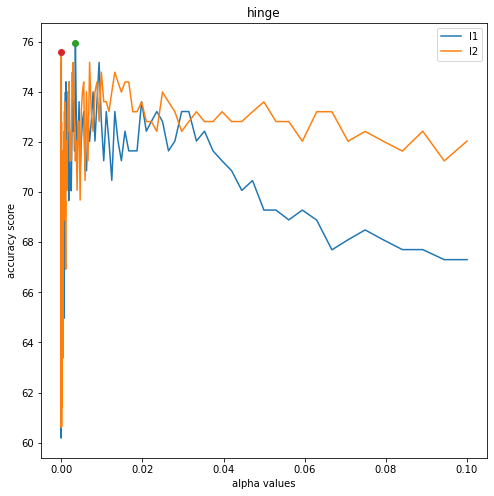

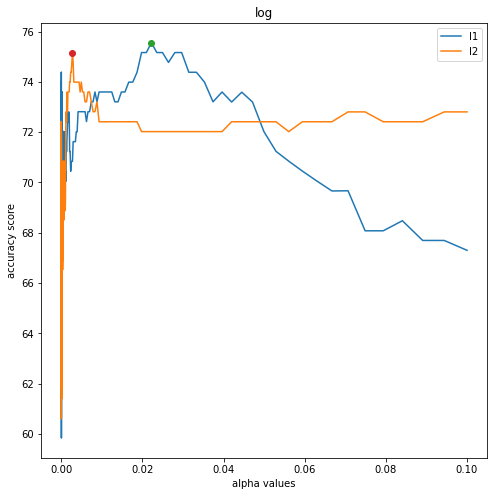

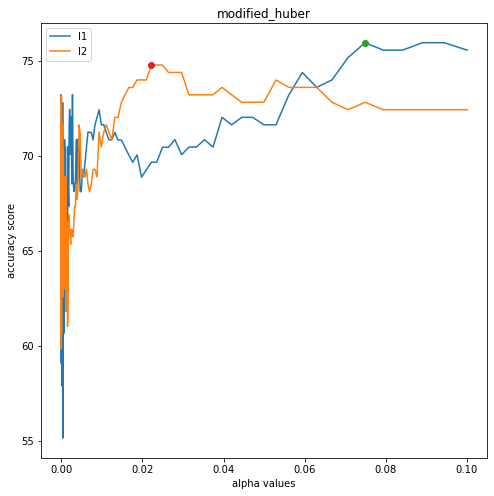

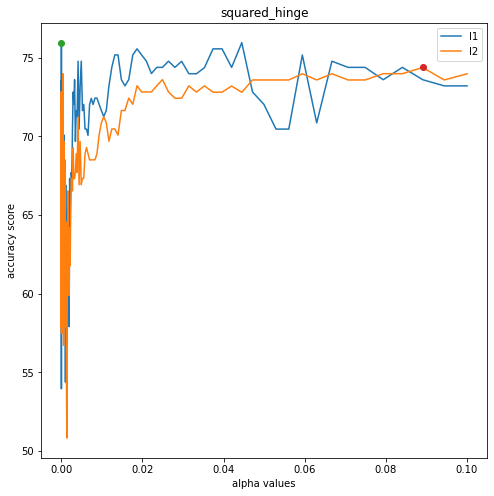

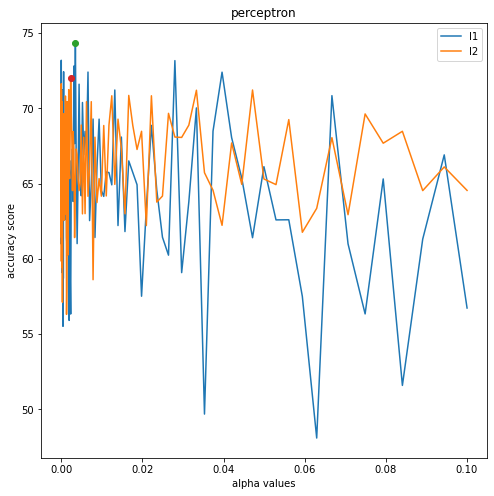

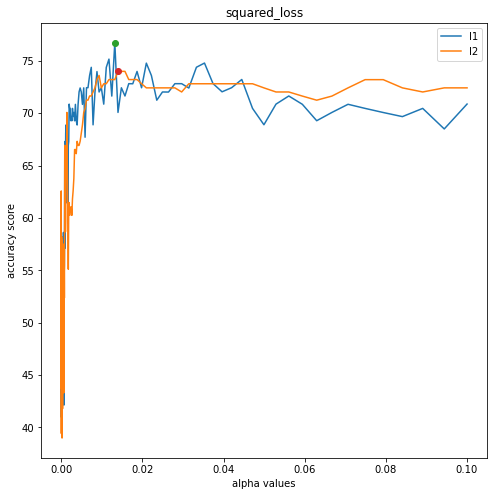

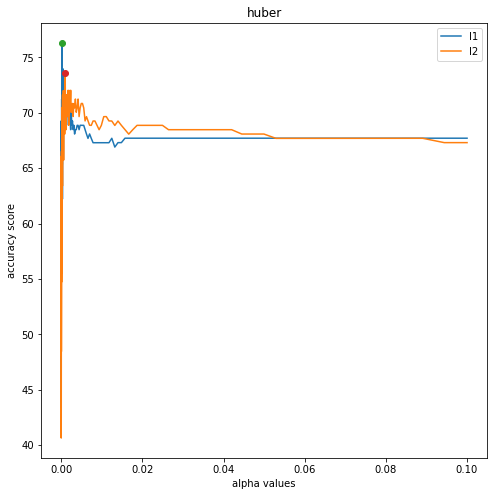

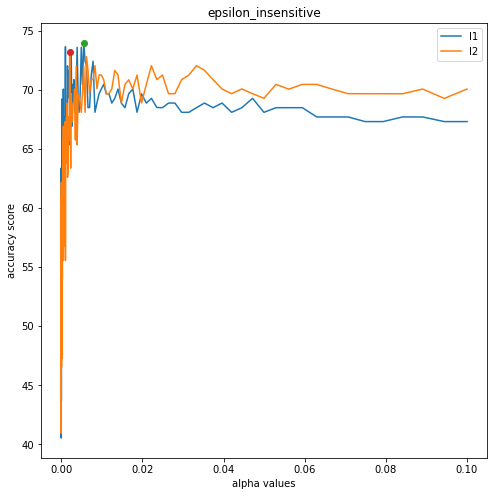

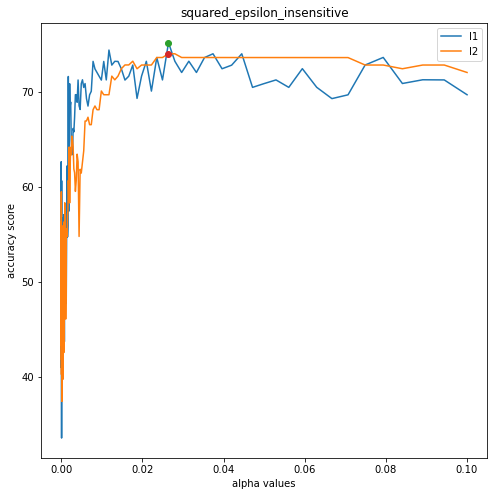

In [61]:
for i in range(len(loss)):
    plt.figure(i, figsize=(8, 8)) 
    plt.title(loss[i])
    plt.xlabel('alpha values')
    plt.ylabel('accuracy score')
    
    plt.plot(alpha_values,score_model[:, i][:, 0])
    plt.plot(alpha_values,score_model[:, i][:, 1])
    plt.legend(["l1","l2"])
    
    n_max1 = score_model[:, i][:, 0].argmax()
    plt.plot(alpha_values[n_max1],score_model[:, i][:, 0][n_max1],'o')
    n_max2 = score_model[:, i][:, 1].argmax()
    plt.plot(alpha_values[n_max2],score_model[:, i][:, 1][n_max2],'o')

In [62]:
score_train = np.amax(score_model)
index = np.where(score_model == score_train)

alphaWithMaxScore = alpha_values[index[0][0]]
lossWithMaxScore = loss[index[1][0]]
penaWithMaxScore = penal[index[2][0]]

print("score = ", score_train,  " alpha val = ", alphaWithMaxScore, " loss val = ", lossWithMaxScore, " pena val = ", penaWithMaxScore)

score =  76.72941176470587  alpha val =  0.013200884008314194  loss val =  squared_loss  pena val =  l1


In [63]:
model_test=  SGDClassifier(penalty=penaWithMaxScore, alpha= alphaWithMaxScore     , random_state=5 ,loss=lossWithMaxScore , max_iter=5000)
model_test.fit(x_train,y_train)
model_test.score(x_test,y_test)


0.7111111111111111